# Explore here

In [1]:
# Your code here
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

airbnb_data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/data-preprocessing-project-tutorial/main/AB_NYC_2019.csv")
airbnb_data

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


In [2]:
airbnb_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

The dataframe contains 48895 rows and 16 columns (variables), meaning there are 48895 property records and 16 features (columns) associated with each property.

In [3]:
airbnb_data.shape

(48895, 16)

In [4]:
airbnb_data.to_csv("../data/raw/airbnb_data.csv", index=False)

In [5]:
airbnb_data.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [6]:
if airbnb_data.duplicated().sum():
    airbnb_data = airbnb_data.drop_duplicates()

print(airbnb_data.shape )

(48895, 16)


In this part we are cleaning the dataframe from any duplicate rows, ensuring that each property record is unique.

In [7]:
airbnb_data.drop(["id", "name", "last_review", "reviews_per_month", "host_name", "host_id"], axis=1, inplace=True)
airbnb_data.head()

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,6,365
1,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2,355
2,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,1,365
3,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,1,194
4,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,1,0


We are removing columns that are not necessary for the analysis.

# Univariate analysis of variables

#### Analysis of categorical variables

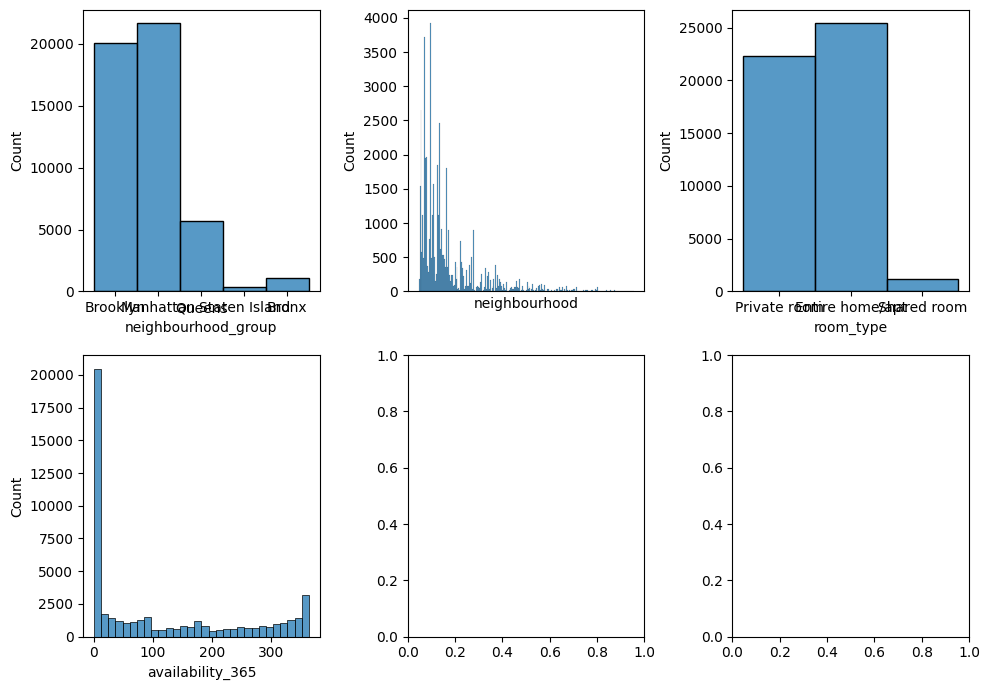

In [8]:
fig, axis = plt.subplots(2, 3, figsize = (10, 7))

sns.histplot(ax = axis[0, 0], data = airbnb_data, x = "neighbourhood_group")
sns.histplot(ax = axis[0, 1], data = airbnb_data, x = "neighbourhood").set_xticks([])
sns.histplot(ax = axis[0, 2], data = airbnb_data, x = "room_type")
sns.histplot(ax = axis[1, 0], data = airbnb_data, x = "availability_365")

plt.tight_layout()

plt.show()

- The graph shows that Brooklyn and Manhattan are the groups with the largest number of properties, Queens has a moderate number of properties, and Bronx and Staten Island have significantly fewer properties.
- In the neighbourhood the distribution is very dispersed, with some neighbourhoods having many more properties than others. And there are a large number of neighbourhoods with few properties, which indicates a high variability.
- The most common room types are Private room and Entire home/apt. Share room is less common.
- Many properties have low availability (close to 0 days per year). In general, many properties are available for only a few days per year.

#### Analysis of numerical variables

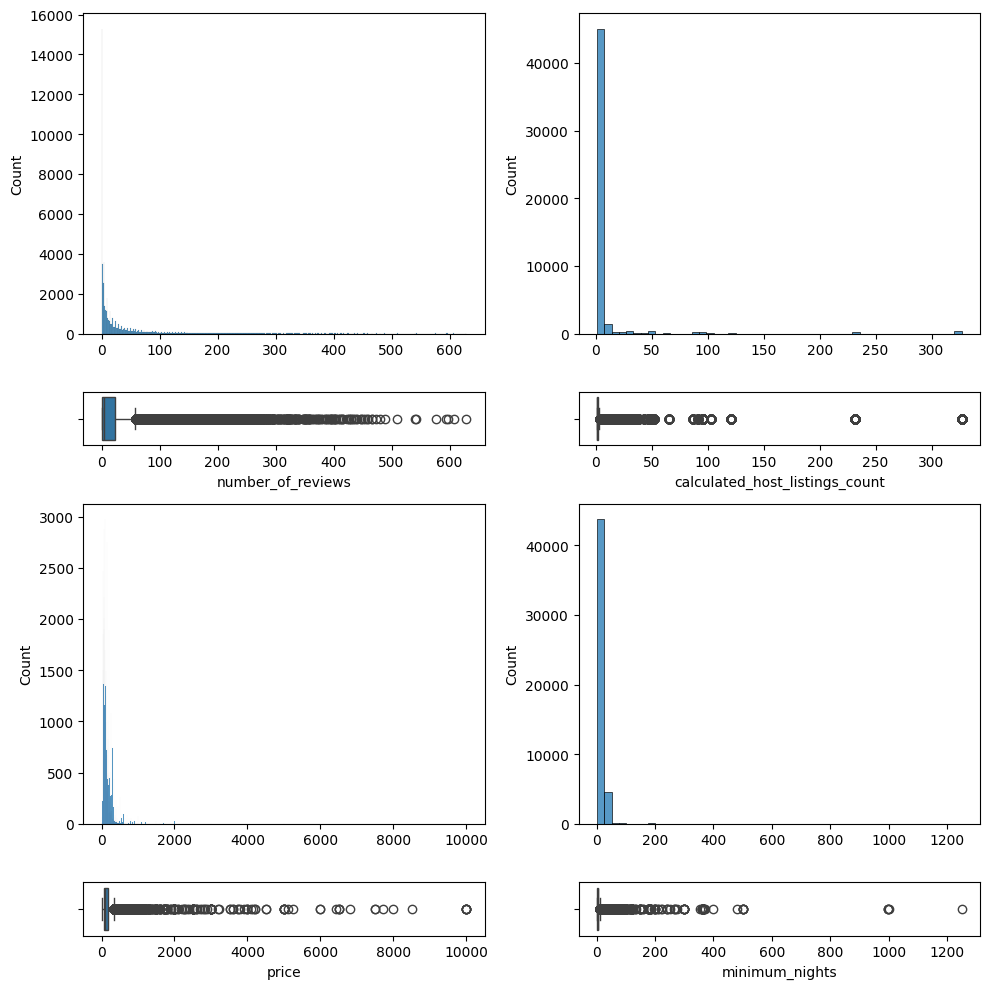

In [9]:
fig, axis = plt.subplots(4, 2, figsize = (10, 10), gridspec_kw={'height_ratios': [6, 1, 6, 1]})

sns.histplot(ax = axis[0, 0], data = airbnb_data, x = "number_of_reviews").set(xlabel = None)
sns.boxplot(ax = axis[1, 0], data = airbnb_data, x = "number_of_reviews")

sns.histplot(ax=axis[0, 1], data=airbnb_data, x="calculated_host_listings_count", bins=50).set(xlabel=None)
sns.boxplot(ax=axis[1, 1], data=airbnb_data, x="calculated_host_listings_count")

sns.histplot(ax = axis[2, 0], data = airbnb_data, x = "price").set(xlabel = None)
sns.boxplot(ax = axis[3, 0], data = airbnb_data, x = "price")

sns.histplot(ax=axis[2, 1], data=airbnb_data, x="minimum_nights", bins=50).set(xlabel=None)
sns.boxplot(ax=axis[3, 1], data=airbnb_data, x="minimum_nights")

plt.tight_layout()

plt.show()

## Multivariate analysis of variables

#### Numerical-Numeric Analysis

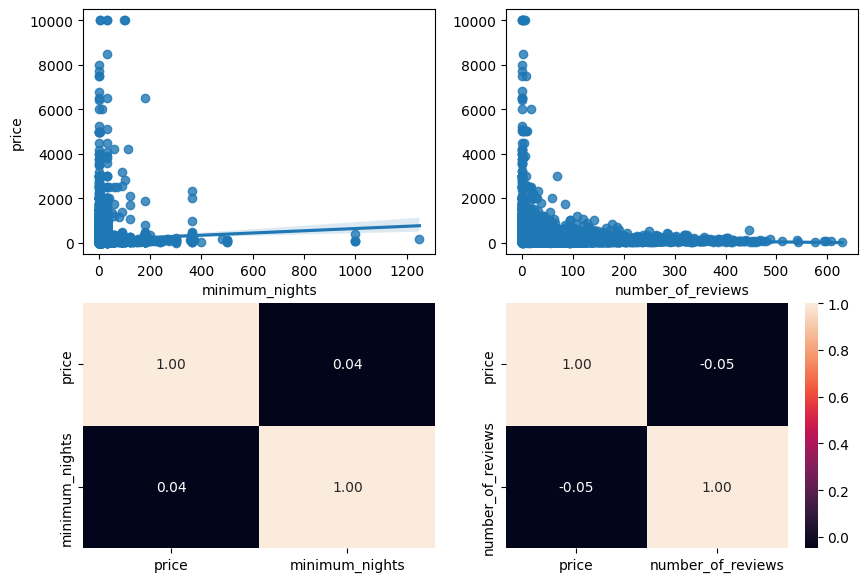

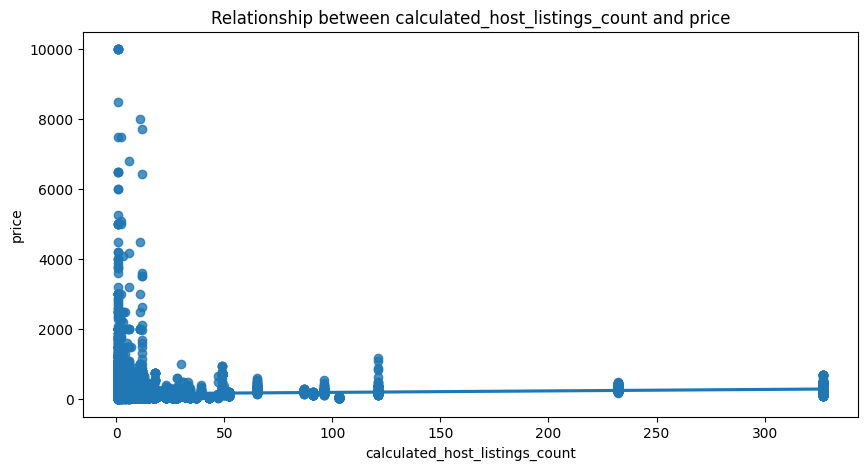

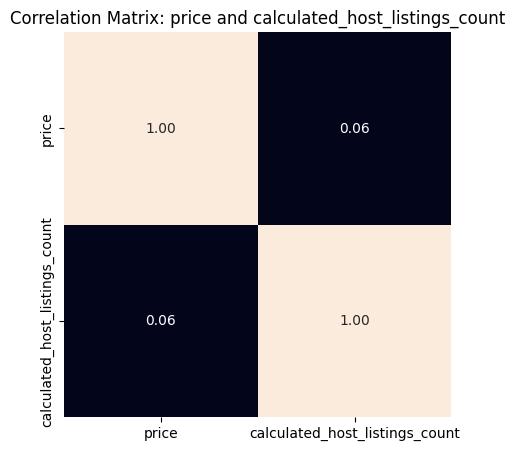

In [10]:
fig, axis = plt.subplots(2, 2, figsize=(10, 7))

sns.regplot(ax=axis[0, 0], data=airbnb_data, x="minimum_nights", y="price")
sns.heatmap(airbnb_data[["price", "minimum_nights"]].corr(), annot=True, fmt=".2f", ax=axis[1, 0], cbar=False)

sns.regplot(ax=axis[0, 1], data=airbnb_data, x="number_of_reviews", y="price").set(ylabel=None)
sns.heatmap(airbnb_data[["price", "number_of_reviews"]].corr(), annot=True, fmt=".2f", ax=axis[1, 1])

fig, ax = plt.subplots(figsize=(10, 5))
sns.regplot(data=airbnb_data, x="calculated_host_listings_count", y="price")
plt.title('Relationship between calculated_host_listings_count and price')
plt.xlabel('calculated_host_listings_count')
plt.ylabel('price')
plt.show()

plt.figure(figsize=(5, 5))
sns.heatmap(airbnb_data[["price", "calculated_host_listings_count"]].corr(), annot=True, fmt=".2f", cbar=False)
plt.title('Correlation Matrix: price and calculated_host_listings_count')
plt.show()

- The correlation matrix shows a value of 0.04, indicating a very weak correlation between minimum_nights and price.
- The correlation matrix shows a value of -0.05, indicating a very weak negative correlation between number_of_reviews and price.
- There are some outliers with very high prices, especially when the host's number of listings is low.
- Visually, there appears to be a weak negative correlation between calculated_host_listings_count and price, as high prices are more common when the number of listings is low.
- The correlation is so low that it suggests that the number of listings a host has does not have a significant impact on price.


#### Categorical-categorical analysis

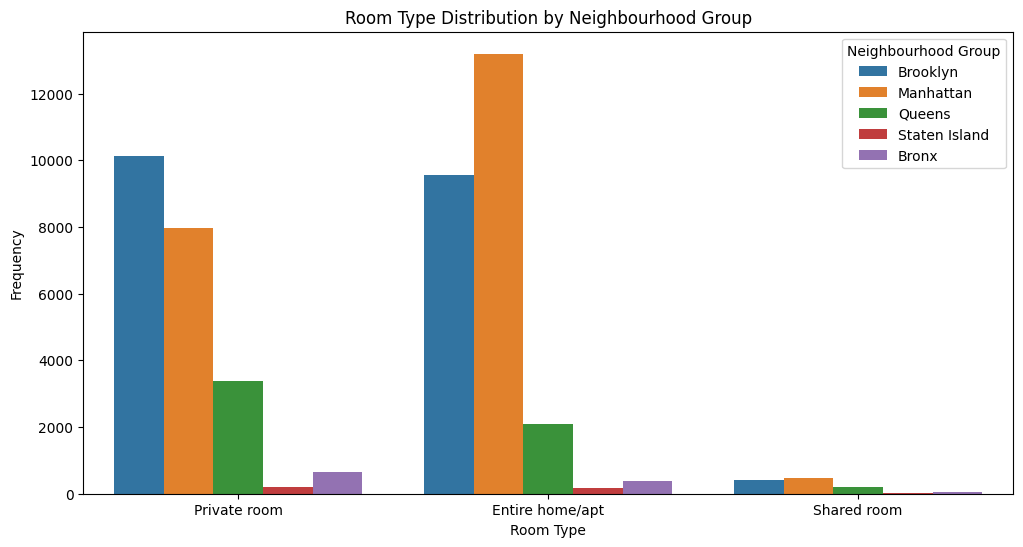

In [11]:
plt.figure(figsize=(12, 6))
sns.countplot(data=airbnb_data, x='room_type', hue='neighbourhood_group')
plt.title('Room Type Distribution by Neighbourhood Group')
plt.xlabel('Room Type')
plt.ylabel('Frequency')
plt.legend(title='Neighbourhood Group')
plt.show()

- Manhattan and Brooklyn are the neighborhoods with the most accommodation options, both in private rooms and entire apartments.
- Queens offers a moderate amount of both types of accommodation.
- Bronx and Staten Island have a much smaller presence in the accommodation market.

The chart suggests that most housing offers are concentrated in Manhattan and Brooklyn, especially for entire apartments.

#### Numerical-categorical analysis

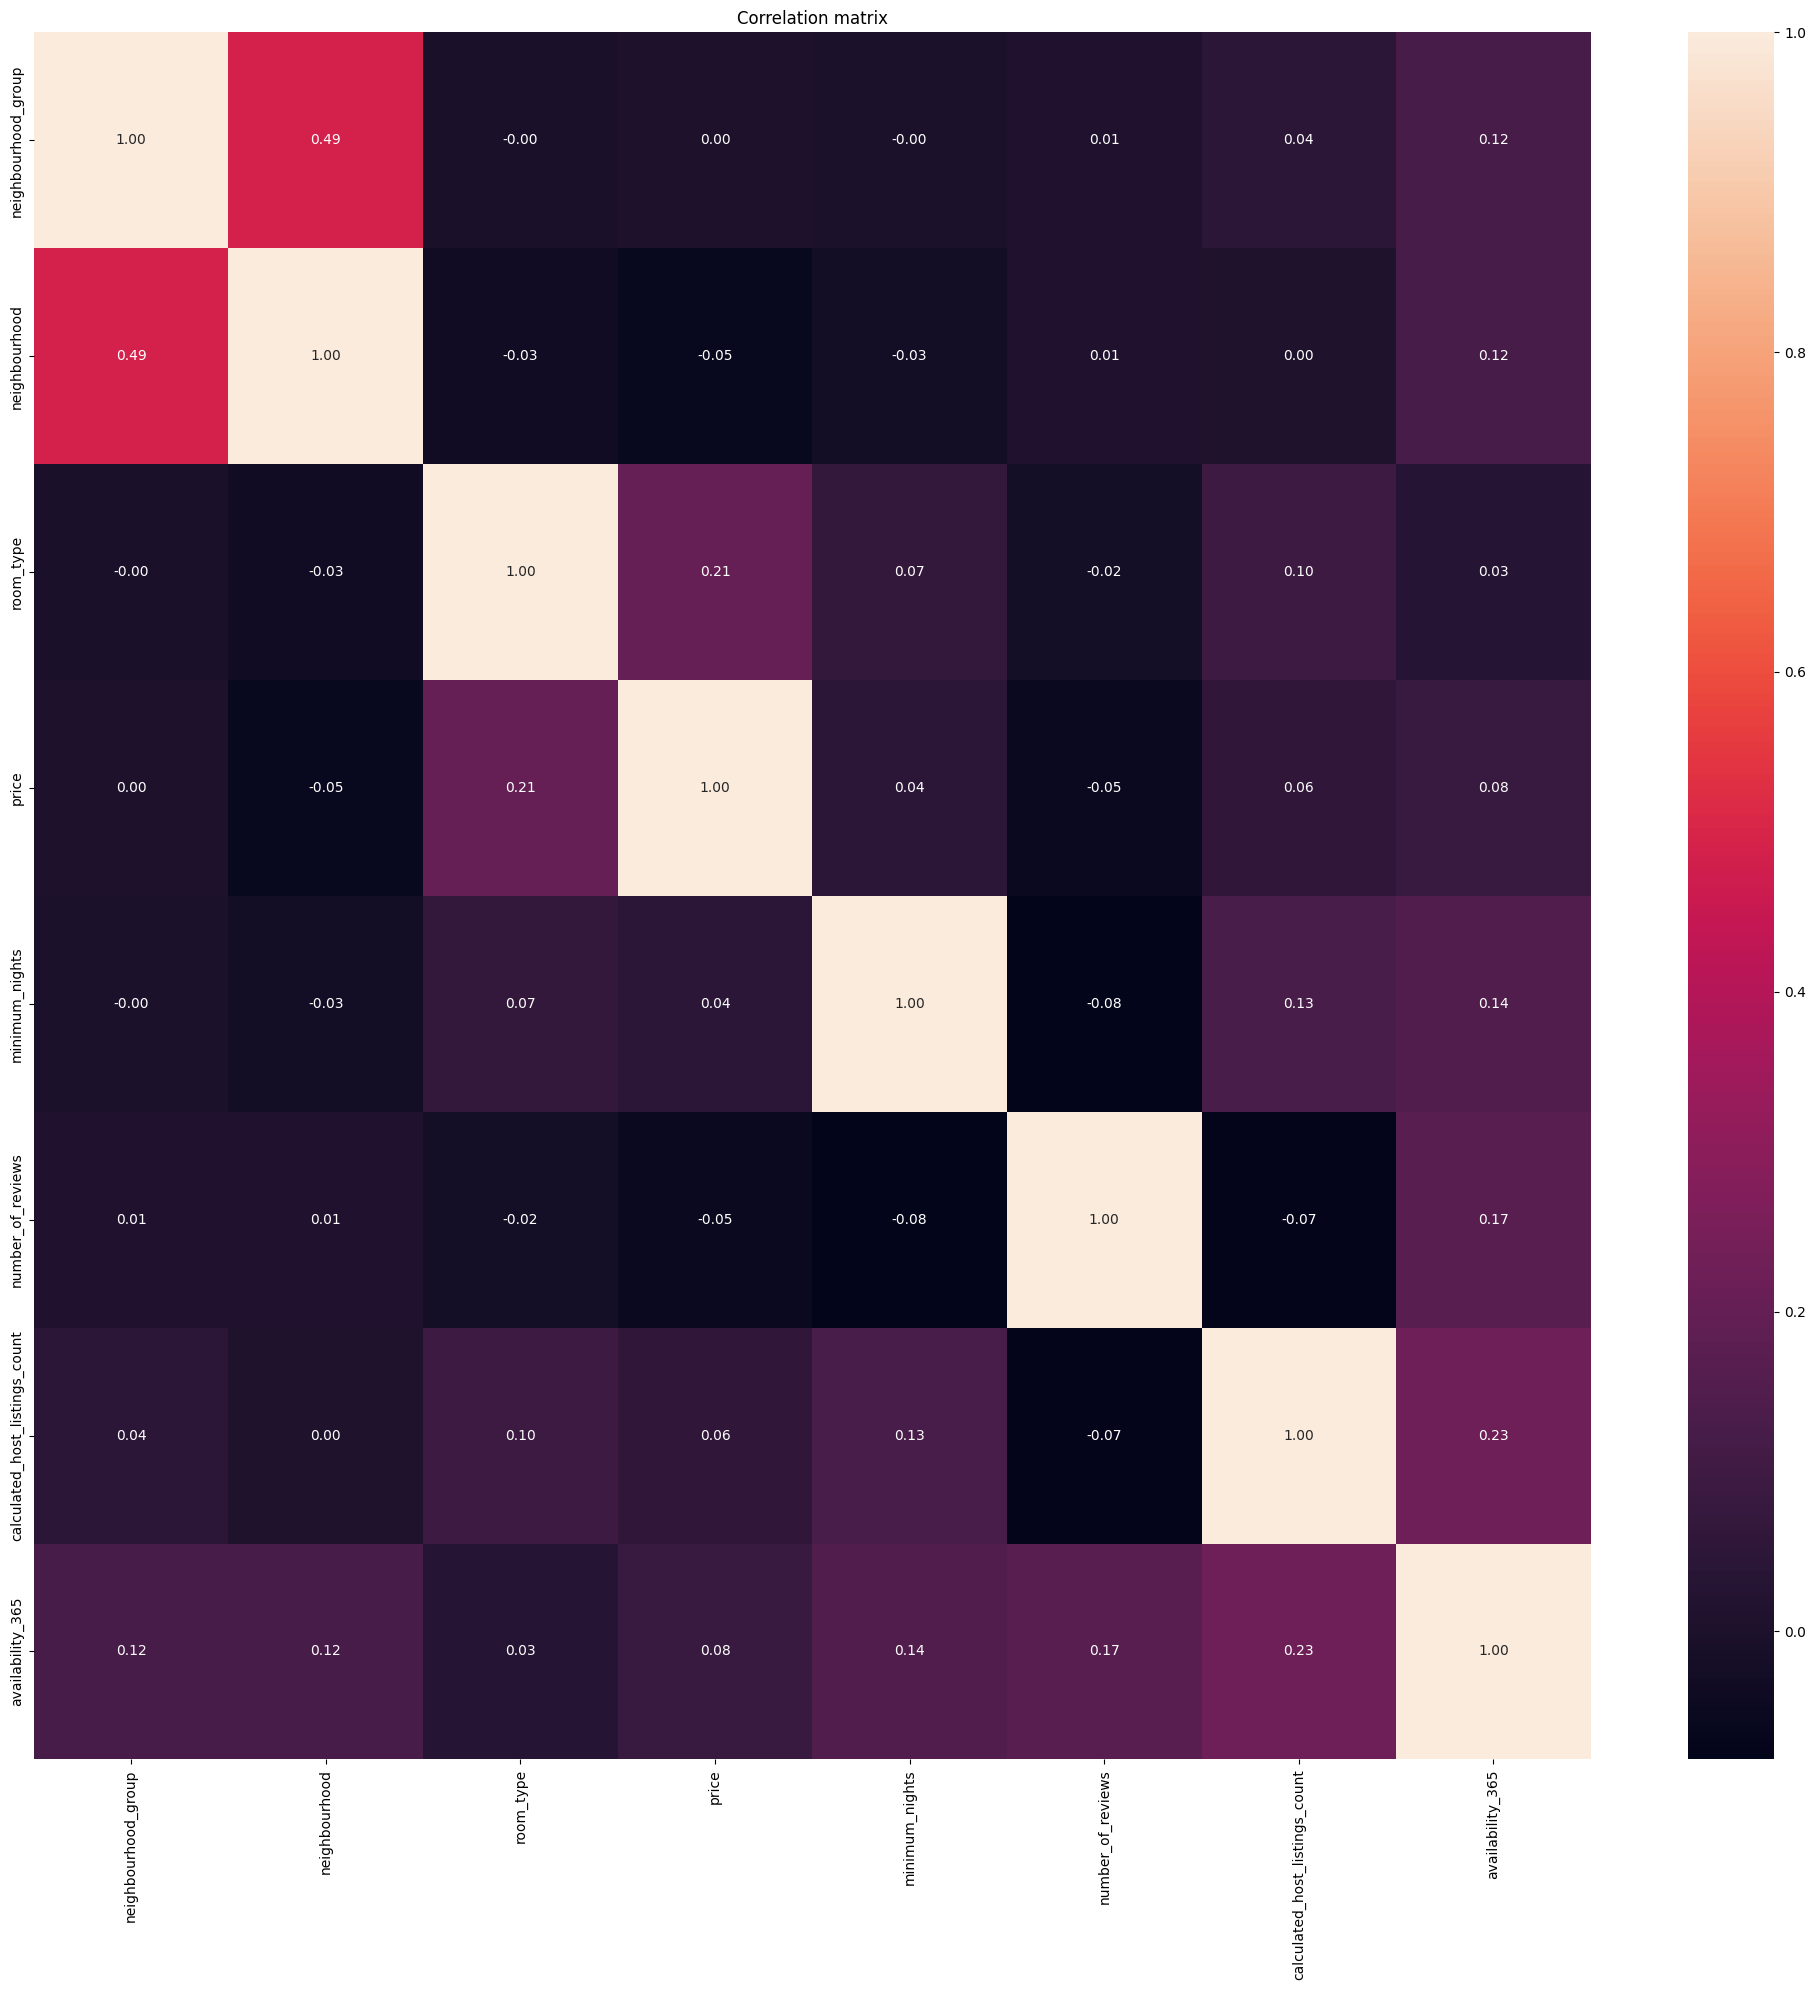

In [12]:
airbnb_data['neighbourhood_group'] = pd.factorize(airbnb_data['neighbourhood_group'])[0]
airbnb_data['neighbourhood'] = pd.factorize(airbnb_data['neighbourhood'])[0]
airbnb_data['room_type'] = pd.factorize(airbnb_data['room_type'])[0]

correlation_matrix = airbnb_data[["neighbourhood_group", "neighbourhood", "room_type", "price", "minimum_nights", 
                                    "number_of_reviews", "calculated_host_listings_count", "availability_365"]].corr()

fig, axes = plt.subplots(figsize=(20, 20))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f")
plt.title('Correlation matrix')
plt.tight_layout()
plt.show()


- neighbourhood_group and neighbourhood have a moderate positive correlation (0.49), suggesting that there is some relationship between these two variables.
- room_type and price have a low positive correlation (0.21), indicating that room type has a slight relationship with price.
- minimum_nights and number_of_reviews have a low negative correlation (-0.08), suggesting that as minimum nights increase, the number of reviews tends to decrease slightly.
- calculated_host_listings_count and availability_365 have a moderate positive correlation (0.23), indicating that as a host's number of listings increases, availability also tends to increase.


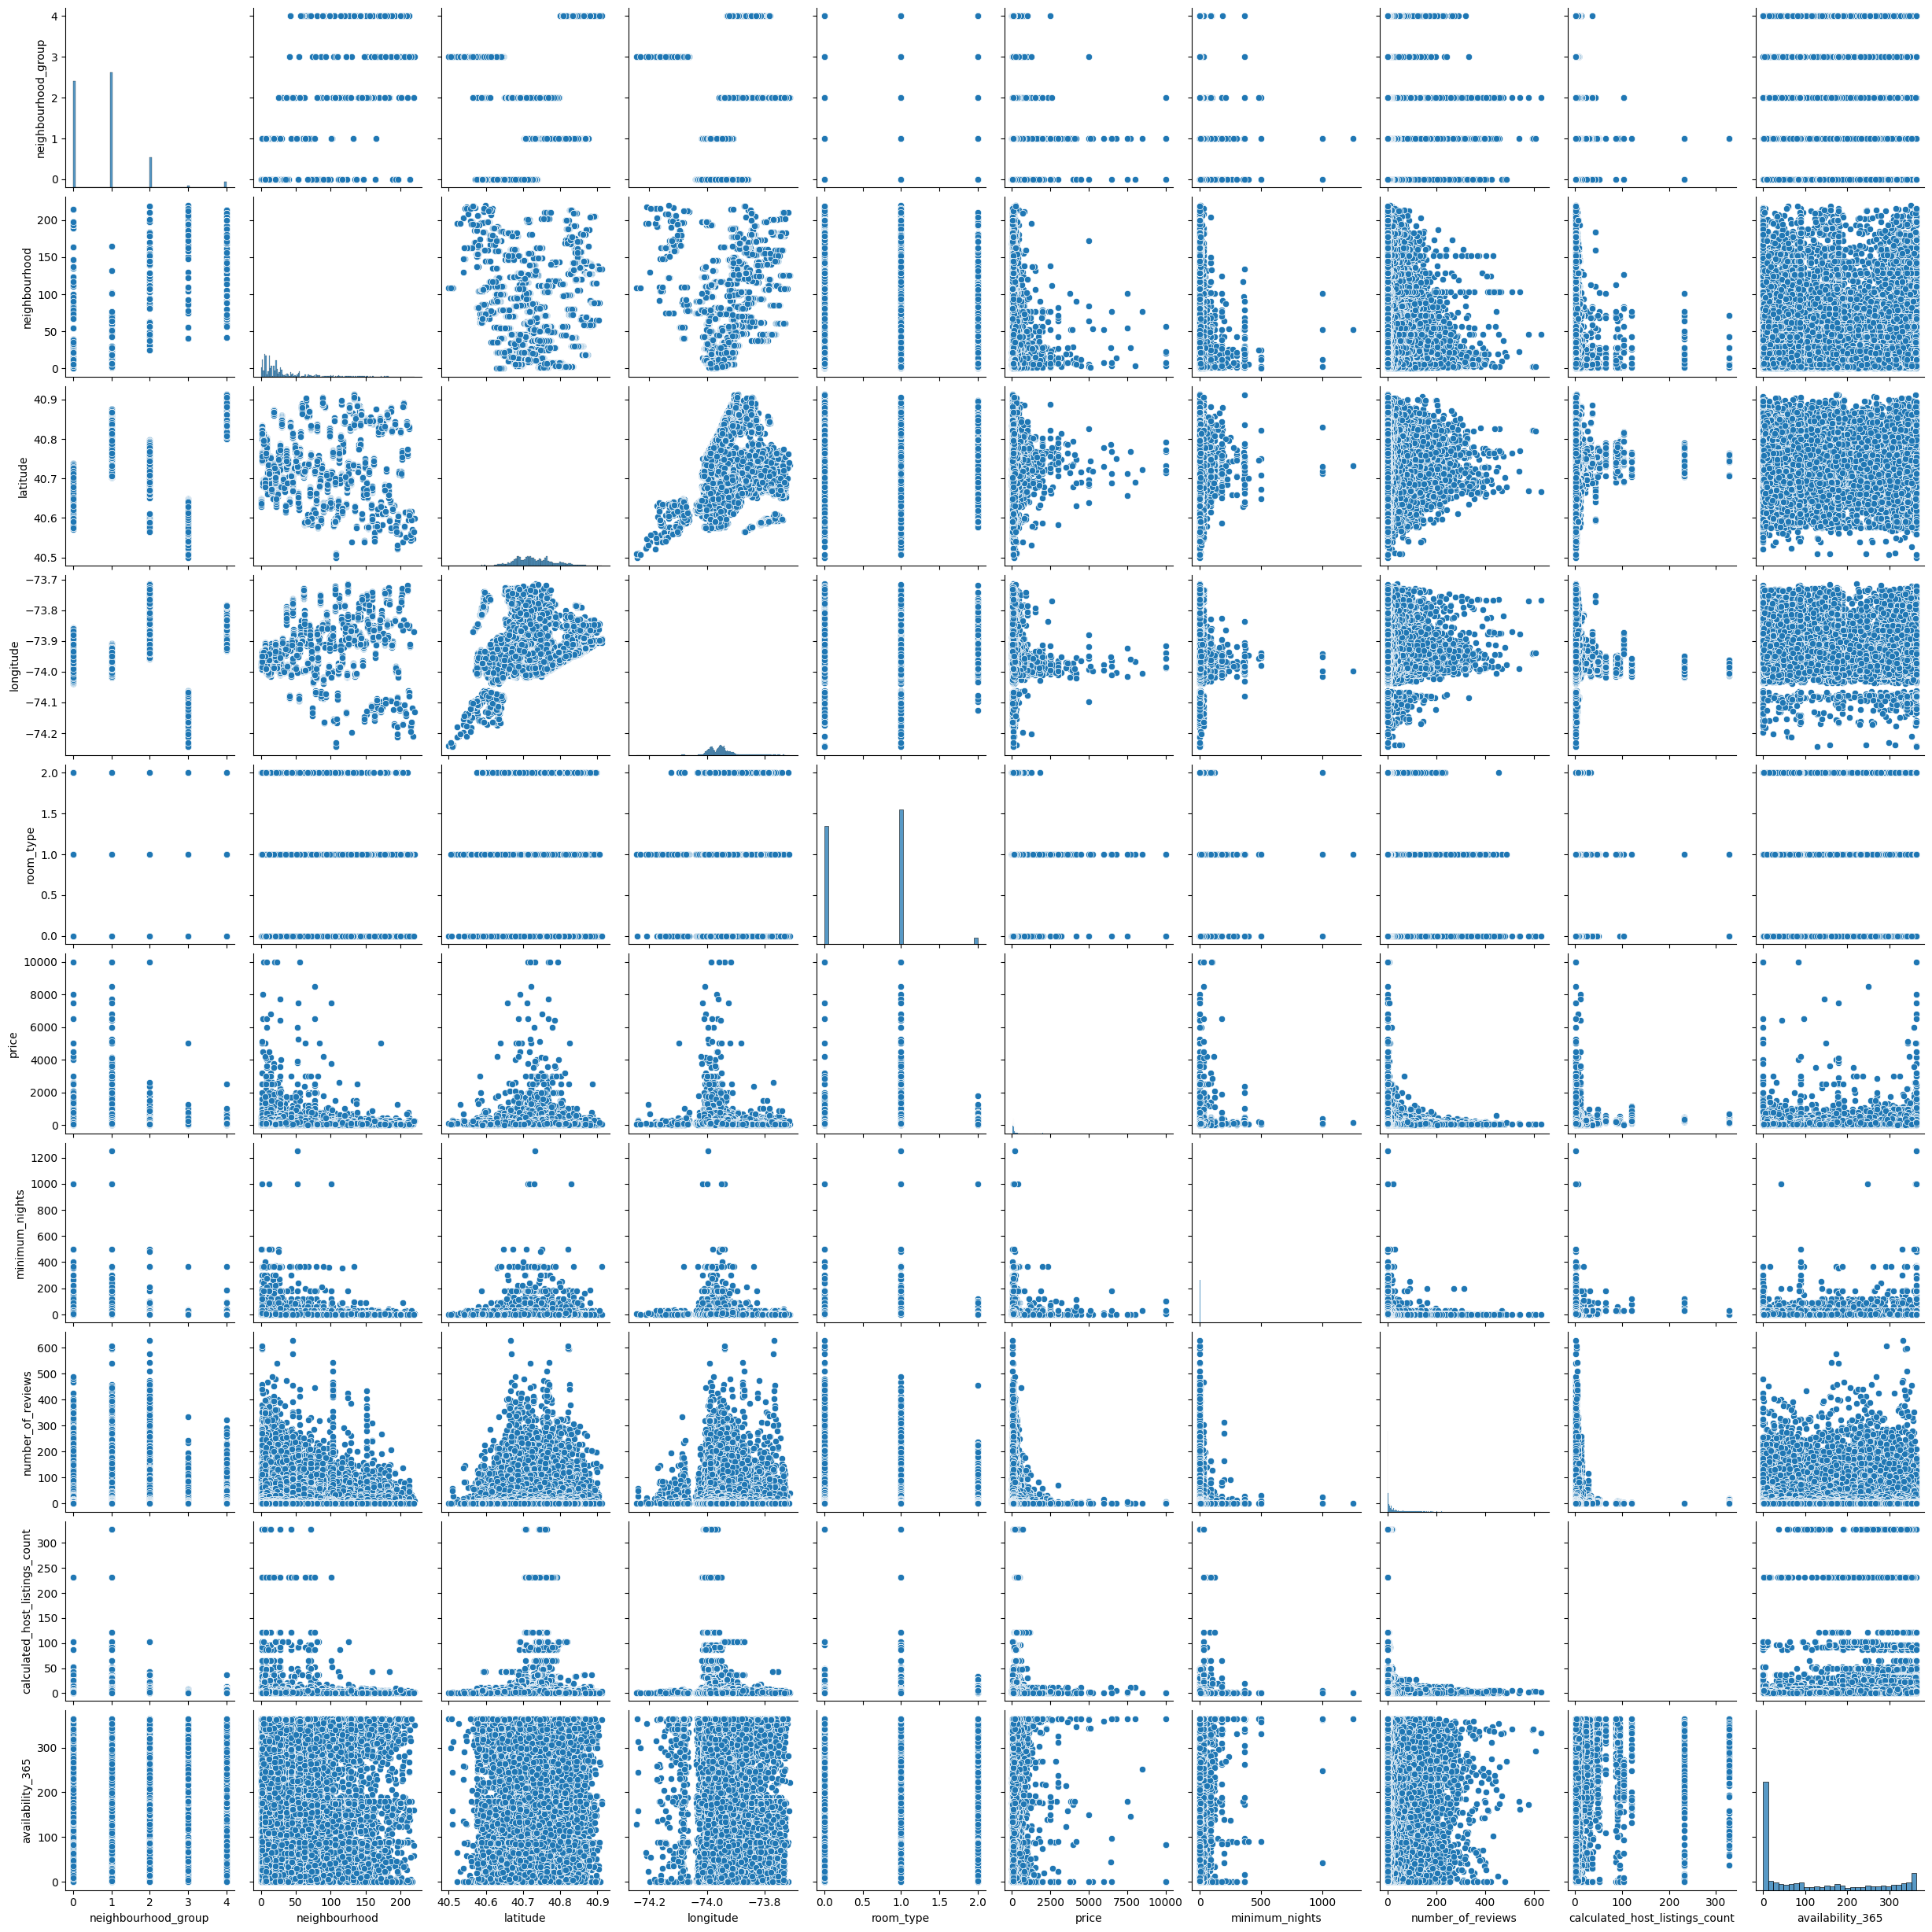

In [13]:
sns.pairplot(data = airbnb_data)

In [14]:
airbnb_data.describe()

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
count,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,0.786911,29.888782,40.728949,-73.952170,0.567113,152.720687,7.029962,23.274466,7.143982,112.781327
std,0.844386,34.676634,0.054530,0.046157,0.541249,240.154170,20.510550,44.550582,32.952519,131.622289
min,0.000000,0.000000,40.499790,-74.244420,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
25%,0.000000,7.500000,40.690100,-73.983070,0.000000,69.000000,1.000000,1.000000,1.000000,0.000000
50%,1.000000,19.000000,40.723070,-73.955680,1.000000,106.000000,3.000000,5.000000,1.000000,45.000000
75%,1.000000,37.000000,40.763115,-73.936275,1.000000,175.000000,5.000000,24.000000,2.000000,227.000000
max,4.000000,220.000000,40.913060,-73.712990,2.000000,10000.000000,1250.000000,629.000000,327.000000,365.000000


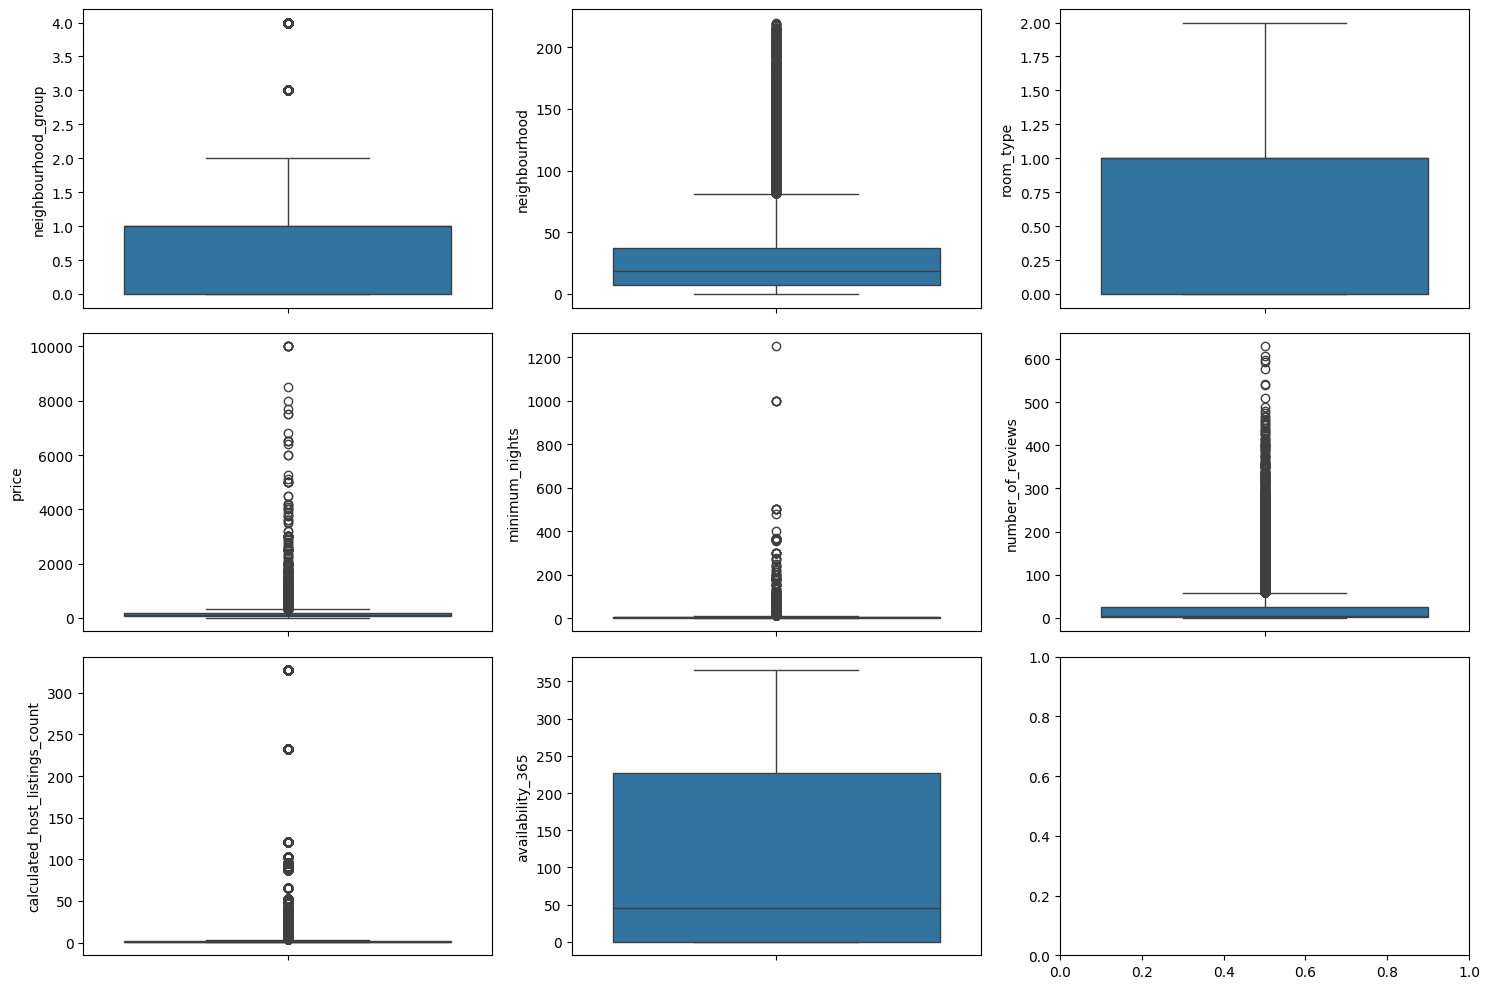

In [15]:
fig, axis = plt.subplots(3, 3, figsize = (15, 10))

sns.boxplot(ax = axis[0, 0], data = airbnb_data, y = "neighbourhood_group")
sns.boxplot(ax = axis[0, 1], data = airbnb_data, y = "neighbourhood")
sns.boxplot(ax = axis[0, 2], data = airbnb_data, y = "room_type")
sns.boxplot(ax = axis[1, 0], data = airbnb_data, y = "price")
sns.boxplot(ax = axis[1, 1], data = airbnb_data, y = "minimum_nights")
sns.boxplot(ax = axis[1, 2], data = airbnb_data, y = "number_of_reviews")
sns.boxplot(ax = axis[2, 0], data = airbnb_data, y = "calculated_host_listings_count")
sns.boxplot(ax = axis[2, 1], data = airbnb_data, y = "Embarked_n")

plt.tight_layout()

plt.show()

In [16]:
price_stats = airbnb_data["price"].describe()
price_stats

count    48895.000000
mean       152.720687
std        240.154170
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

In [17]:
price_iqr = price_stats["75%"] - price_stats["25%"]
upper_limit = price_stats["75%"] + 1.5 * price_iqr
lower_limit = price_stats["25%"] - 1.5 * price_iqr

print(f"The upper and lower bounds for outlier searching are {round(upper_limit, 2)} and {round(lower_limit, 2)}, with an interquartile range of {round(price_iqr, 2)}")

The upper and lower bounds for outlier searching are 334.0 and -90.0, with an interquartile range of 106.0


In [21]:
airbnb_data[airbnb_data["price"] > 0]

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,0,0,40.64749,-73.97237,0,149,1,9,6,365
1,1,1,40.75362,-73.98377,1,225,1,45,2,355
2,1,2,40.80902,-73.94190,0,150,3,0,1,365
3,0,3,40.68514,-73.95976,1,89,1,270,1,194
4,1,4,40.79851,-73.94399,1,80,10,9,1,0
...,...,...,...,...,...,...,...,...,...,...
48890,0,6,40.67853,-73.94995,0,70,2,0,2,9
48891,0,21,40.70184,-73.93317,0,40,4,0,2,36
48892,1,2,40.81475,-73.94867,1,115,10,0,1,27
48893,1,7,40.75751,-73.99112,2,55,1,0,6,2


In [22]:
airbnb_data.isnull().sum().sort_values(ascending=False)

neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [23]:
review_stats = airbnb_data["number_of_reviews"].describe()
review_stats

count    48895.000000
mean        23.274466
std         44.550582
min          0.000000
25%          1.000000
50%          5.000000
75%         24.000000
max        629.000000
Name: number_of_reviews, dtype: float64

In [24]:
review_iqr = review_stats["75%"] - review_stats["25%"]

upper_limit = review_stats["75%"] + 1.5 * review_iqr
lower_limit = review_stats["25%"] - 1.5 * review_iqr

print(f"The upper and lower limits for finding outliers are {round(upper_limit, 2)} and {round(lower_limit, 2)}, with an interquartile range of {round(review_iqr, 2)}")

The upper and lower limits for finding outliers are 58.5 and -33.5, with an interquartile range of 23.0


In [25]:
hostlist_stats = airbnb_data["calculated_host_listings_count"].describe()
hostlist_stats

count    48895.000000
mean         7.143982
std         32.952519
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max        327.000000
Name: calculated_host_listings_count, dtype: float64

In [26]:
hostlist_iqr = hostlist_stats["75%"] - hostlist_stats["25%"]

upper_limit = hostlist_stats["75%"] + 1.5 * hostlist_iqr
lower_limit = hostlist_stats["25%"] - 1.5 * hostlist_iqr

print(f"The upper and lower limits for finding outliers are {round(upper_limit, 2)} and {round(lower_limit, 2)}, with an interquartile range of {round(hostlist_iqr, 2)}")

The upper and lower limits for finding outliers are 3.5 and -0.5, with an interquartile range of 1.0


In [ ]:
airbnb_data = airbnb_data[airbnb_data["calculated_host_listings_count"] > 4]

In [31]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import chi2, SelectKBest
from sklearn.model_selection import train_test_split

num_variables = ["number_of_reviews", "minimum_nights", "calculated_host_listings_count", 
                 "availability_365", "neighbourhood_group", "room_type"]

scaler = MinMaxScaler()
scal_features = scaler.fit_transform(airbnb_data[num_variables])
df_scal = pd.DataFrame(scal_features, index = airbnb_data.index, columns = num_variables)
df_scal["price"] = airbnb_data["price"]
df_scal.head()

,number_of_reviews,minimum_nights,calculated_host_listings_count,availability_365,neighbourhood_group,room_type,price
0,0.014308,0.000000,0.015337,1.000000,0.00,0.0,149
1,0.071542,0.000000,0.003067,0.972603,0.25,0.5,225
2,0.000000,0.001601,0.000000,1.000000,0.25,0.0,150
3,0.429253,0.000000,0.000000,0.531507,0.00,0.5,89
4,0.014308,0.007206,0.000000,0.000000,0.25,0.5,80


In [36]:
X = df_scal.drop("price", axis=1)  
y = df_scal["price"]

X_train_set, X_test_set, y_train_set, y_test_set = train_test_split(X, y, test_size=0.2, random_state=42)

X_train_set.head()

,number_of_reviews,minimum_nights,calculated_host_listings_count,availability_365,neighbourhood_group,room_type
32645,0.017488,0.001601,0.000000,0.002740,0.00,0.5
23615,0.003180,0.000801,0.000000,0.000000,0.25,0.0
31183,0.000000,0.000801,0.003067,0.000000,0.00,0.0
29260,0.138315,0.001601,0.000000,0.731507,0.00,0.5
7275,0.020668,0.003203,0.000000,0.000000,0.50,0.0


In [37]:
X_train_set["price"] = list(y_train_set)
X_test_set["price"] = list(y_test_set)

X_train_set.to_csv("../data/processed/clean_train.csv", index=False)
X_test_set.to_csv("../data/processed/clean_test.csv", index=False)